<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Pandas

In [1]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [5]:
users = pd.read_csv('../data/user.tbl', sep='|')

**Examine the users data.**

In [6]:
users                  # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [9]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [10]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [11]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [12]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [13]:
# Number of rows and columns
users.shape

(943, 5)

In [14]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [15]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [16]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [18]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [19]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [20]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

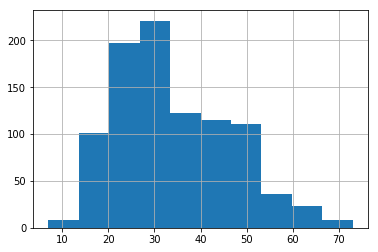

In [21]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist()

**Count the number of occurrences of each value.**

In [22]:
users.gender.value_counts()    # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

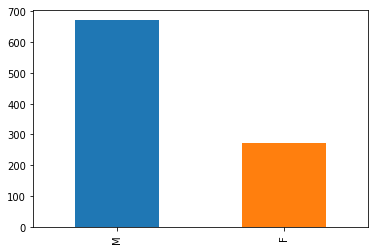

In [23]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [24]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

Text(0.5, 1.0, 'Number of users per age')

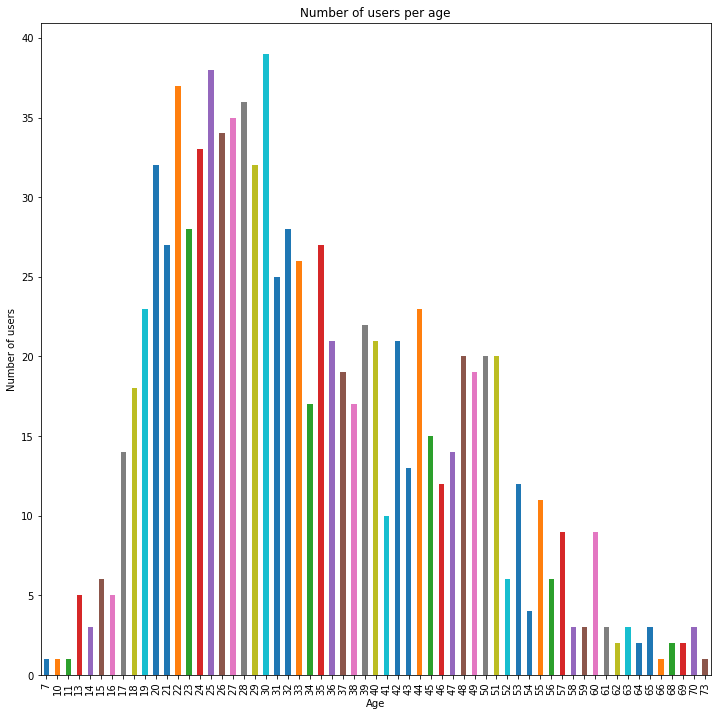

In [25]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12))  # Bigger plot by increasing age
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.title('Number of users per age')

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [26]:
# value_counts of resulting Series
users.age.unique()

array([24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51, 17,
       48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66, 62,
       11, 65, 68, 63, 64, 10, 73, 58, 69, 70], dtype=int64)

In [27]:
# number of unique values in a dataframe
users.age.nunique()

61

In [28]:
# 10 largest values
users.age.nlargest(10)

480    73
766    70
802    70
859    70
558    69
584    69
348    68
572    68
210    66
317    65
Name: age, dtype: int64

In [29]:
# 10 smallest values
users.age.nsmallest(10)

29      7
470    10
288    11
141    13
608    13
627    13
673    13
879    13
205    14
812    14
Name: age, dtype: int64

**Sorting**

In [30]:
# Sort a Series.
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
141    13
673    13
627    13
812    14
205    14
886    14
848    15
280    15
460    15
617    15
178    15
100    15
56     16
579    16
549    16
450    16
433    16
620    17
618    17
760    17
374    17
903    17
645    17
581    17
256    17
       ..
89     60
307    60
930    60
751    60
468    60
463    60
233    60
693    60
933    61
350    61
105    61
519    62
265    62
857    63
776    63
363    63
844    64
422    64
317    65
650    65
563    65
210    66
348    68
572    68
558    69
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [31]:
users.sort_values('age', inplace = True)

In [33]:
# Use descending order instead.
users.sort_values('age', ascending=False).head()

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
859,860,70,F,retired,48322
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
584,585,69,M,librarian,98501


In [34]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'], ascending = [True, False]).head()

,user_id,age,gender,occupation,zip_code
802,803,70,M,administrator,78212
265,266,62,F,administrator,78756
818,819,59,M,administrator,40205
130,131,59,F,administrator,15237
6,7,57,M,administrator,91344


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [37]:
# load in a new dataset
drinks = pd.read_csv('../data/drinks.csv')

In [38]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [39]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [40]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [41]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('../data/drinks.csv', header=0, names=drink_cols)

In [42]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [43]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Removing Columns**

In [44]:
drinks.drop(13)
drinks.iloc[13]

country      Bangladesh
beer                  0
spirit                0
wine                  0
liters                0
continent            AS
Name: 13, dtype: object

In [47]:
# Drop multiple columns.
drinks.drop('liters', axis=1)

,country,beer,spirit,wine,continent
0,Afghanistan,0,0,0,AS
1,Albania,89,132,54,EU
2,Algeria,25,0,14,AF
3,Andorra,245,138,312,EU
4,Angola,217,57,45,AF
5,Antigua & Barbuda,102,128,45,NaN
6,Argentina,193,25,221,SA
7,Armenia,21,179,11,EU
8,Australia,261,72,212,OC
9,Austria,279,75,191,EU


In [ ]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop('liters', axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [48]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [49]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [50]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174     True
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [51]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [52]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [53]:
drinks.continent.notnull().sum()

170

In [54]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Find missing values in a `DataFrame`.**

In [152]:
# DataFrame of Booleans
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


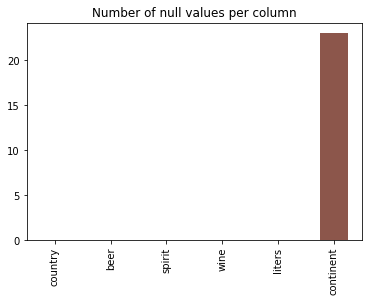

In [55]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [56]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [57]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [58]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [59]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [60]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('../data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [61]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [62]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [ ]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

In [ ]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

In [ ]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

In [ ]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

In [ ]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

In [ ]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

<a id="exercise-four"></a>
### Exercise

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [ ]:
# For each occupation in "users", count the number of occurrences.

In [ ]:
# For each occupation, calculate the mean age.

In [ ]:
# For each occupation, calculate the minimum and maximum ages.

In [ ]:
# For each combination of occupation and gender, calculate the mean age.

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [ ]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

In [ ]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

**Use `loc` to select columns by name.**

In [ ]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']  

In [ ]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

In [ ]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

In [ ]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

In [ ]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

In [ ]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

In [ ]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

In [ ]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

In [ ]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [ ]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

In [ ]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

In [ ]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)

In [ ]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)